# Teaching Trust Candidate Exercise

## Table of Contents

* [Python imports](#imports)
* [Data Wrangling](#wrangling)
* [Helper Function](#helper)
* [Approaching Grade Level](#approaching)
    * [Overall](#approaching_overall)
    * [By School Type](#approaching_school_type)
    * [By Gender](#approaching_gender)
    * [By Race](#approaching_race)
* [Meets Grade Level](#meets)
    * [Overall](#meets_overall)
    * [By School Type](#meets_school_type)
    * [By Gender](#meets_gender)
    * [By Race](#meets_race)
* [Graph](#graphs)
* [Writeup](#writeup)


## Python imports <a class="anchor" id="imports"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Wrangling <a class="anchor" id="wrangling"/>

In [2]:
dallas_staar_data = pd.read_excel('data/Teaching Trust Jr. Data Scientist data subset.xlsx', na_values='.')
dallas_staar_data.describe()

,CAMPUS,CA00AR01016D,CA00AR01S16N,CB00AR01016D,CB00AR01S16N,CW00AR01016D,CW00AR01S16N,CH00AR01016D,CH00AR01S16N,CI00AR01016D,...,CI00AR03A17R,C200AR03A17R,C300AR03A17R,C400AR03A17R,CF00AR03A17R,CM00AR03A17R,CE00AR03A17R,CS00AR03A17R,CR00AR03A17R,CL00AR03A17R
count,2.400000e+02,232.000000,232.000000,228.000000,228.00000,200.000000,200.000000,230.000000,230.000000,114.000000,...,109.0,144.000000,123.000000,31.0,227.000000,228.000000,230.000000,224.000000,230.000000,230.000000
mean,5.790516e+07,396.887931,250.000000,82.622807,45.02193,16.760000,14.670000,284.886957,181.982609,-0.859649,...,-1.0,3.708333,6.317073,-1.0,20.634361,15.736842,17.182609,2.089286,12.269565,14.391304
std,9.674570e+01,386.469026,220.787904,119.010782,58.96564,43.205043,40.504496,323.912929,189.724829,1.268245,...,0.0,18.998666,20.465211,0.0,14.408492,13.148794,12.252142,9.462272,10.133021,11.820119
min,5.790500e+07,0.000000,0.000000,-3.000000,-3.00000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5.790507e+07,184.000000,129.500000,9.000000,6.00000,-1.000000,-1.000000,101.500000,72.250000,-1.000000,...,-1.0,-1.000000,-1.000000,-1.0,11.000000,7.000000,9.000000,-1.000000,4.000000,3.250000
50%,5.790516e+07,262.000000,177.500000,44.500000,23.50000,-1.000000,-1.000000,185.500000,130.000000,-1.000000,...,-1.0,-1.000000,-1.000000,-1.0,20.000000,14.000000,17.000000,-1.000000,13.000000,16.000000
75%,5.790523e+07,403.500000,261.500000,112.500000,63.00000,15.250000,11.250000,290.250000,203.250000,-1.000000,...,-1.0,-1.000000,-1.000000,-1.0,27.000000,22.000000,23.000000,-1.000000,18.000000,22.750000
max,5.790539e+07,3188.000000,1784.000000,797.000000,390.00000,286.000000,278.000000,2335.000000,1362.000000,9.000000,...,-1.0,100.000000,100.000000,-1.0,93.000000,79.000000,83.000000,73.000000,57.000000,56.000000


In [3]:
dallas_staar_data = dallas_staar_data.replace([-1,-3], 0)
dallas_staar_data.describe()

,CAMPUS,CA00AR01016D,CA00AR01S16N,CB00AR01016D,CB00AR01S16N,CW00AR01016D,CW00AR01S16N,CH00AR01016D,CH00AR01S16N,CI00AR01016D,...,CI00AR03A17R,C200AR03A17R,C300AR03A17R,C400AR03A17R,CF00AR03A17R,CM00AR03A17R,CE00AR03A17R,CS00AR03A17R,CR00AR03A17R,CL00AR03A17R
count,2.400000e+02,232.000000,232.000000,228.000000,228.000000,200.000000,200.000000,230.00000,230.000000,114.000000,...,109.0,144.000000,123.000000,31.0,227.000000,228.000000,230.000000,224.000000,230.000000,230.000000
mean,5.790516e+07,396.887931,250.000000,83.008772,45.407895,17.440000,15.350000,285.03913,182.134783,0.166667,...,0.0,4.645833,7.178862,0.0,20.687225,15.837719,17.230435,2.924107,12.417391,14.595652
std,9.674570e+01,386.469026,220.787904,118.736965,58.660040,42.922232,40.238204,323.77776,189.576946,1.063611,...,0.0,18.764819,20.155149,0.0,14.330300,13.022684,12.182525,9.191951,9.943054,11.556846
min,5.790500e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.790507e+07,184.000000,129.500000,9.000000,6.000000,0.000000,0.000000,101.50000,72.250000,0.000000,...,0.0,0.000000,0.000000,0.0,11.000000,7.000000,9.000000,0.000000,4.000000,3.250000
50%,5.790516e+07,262.000000,177.500000,44.500000,23.500000,0.000000,0.000000,185.50000,130.000000,0.000000,...,0.0,0.000000,0.000000,0.0,20.000000,14.000000,17.000000,0.000000,13.000000,16.000000
75%,5.790523e+07,403.500000,261.500000,112.500000,63.000000,15.250000,11.250000,290.25000,203.250000,0.000000,...,0.0,0.000000,0.000000,0.0,27.000000,22.000000,23.000000,0.000000,18.000000,22.750000
max,5.790539e+07,3188.000000,1784.000000,797.000000,390.000000,286.000000,278.000000,2335.00000,1362.000000,9.000000,...,0.0,100.000000,100.000000,0.0,93.000000,79.000000,83.000000,73.000000,57.000000,56.000000


In [4]:
index = ['Approaching grade level', 'Meets grade level']
columns = ['overall', 'school_type_e', 'school_type_m', 'school_type_s', 'female', 'male', 'african american', 
          'american indian', 'asian', 'hispanic', 'pacific islander', 'two or more races', 'white']
percentages_df = pd.DataFrame(index=index, columns=columns)

## Helper Function <a class="anchor" id="helper"/>

In [5]:
# TODO: Write a docstring for this, also round returned values

def calculate_percentage(column1, column2):
    if(dallas_staar_data[column1].sum() == 0 or dallas_staar_data[column2].sum() == 0):
        print("Insufficient data to calculate percentage.")
    else:
        return(dallas_staar_data[column1].sum() / dallas_staar_data[column2].sum() * 100)

# Approaching Grade Level <a class="anchor" id="approaching"/>

## Overall <a class="anchor" id="approaching_overall"/>

For the approaching grade level portion, I looked the list of columns described in the [document](https://rptsvr1.tea.texas.gov/perfreport/tapr/2017/download/campstaar2a.html) relating to approaching grade level. The first part asks for the overall percentage of students whose STAAR reading scores are approaching grade level, for this I used the columns CA00AR01017D and CA00AR01S17N.

In [6]:
percentages_df.loc['Approaching grade level','overall'] = calculate_percentage('CA00AR01S17N', 'CA00AR01017D')
calculate_percentage('CA00AR01S17N', 'CA00AR01017D')

62.963442810563365

## By School Type <a class="anchor" id="approaching_school_type"/>

The next portion breaks down the percentage of students approaching grade level into three categories: Elementary (E), Middle (M), and High School (S). To do this, three new dataframes were created, one for each grade level. Variables were created for this section as well as the [relevant section for Meets Grade Level](#meets_school_type) instead of outputting values, so that they can be used later to create both the graph and the table. 

In [7]:
dallas_staar_data_e = dallas_staar_data[dallas_staar_data['GRDTYPE'] == 'E']
dallas_staar_data_m = dallas_staar_data[dallas_staar_data['GRDTYPE'] == 'M']
dallas_staar_data_s = dallas_staar_data[dallas_staar_data['GRDTYPE'] == 'S']

With the three new dataframes populated, we can use the same columns that were used for the overall percentage.

In [8]:
approach_grade_level_e = (dallas_staar_data_e['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data_e['CA00AR01017D'].sum(skipna=True)) * 100
percentages_df.loc['Approaching grade level', 'school_type_e'] = approach_grade_level_e
print(approach_grade_level_e)

68.06284207242719


In [9]:
approach_grade_level_m = (dallas_staar_data_m['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data_m['CA00AR01017D'].sum(skipna=True)) * 100
percentages_df.loc['Approaching grade level', 'school_type_m'] = approach_grade_level_m
print(approach_grade_level_m)

64.53500522466041


In [10]:
approach_grade_level_s = (dallas_staar_data_s['CA00AR01S17N'].sum(skipna=True) / dallas_staar_data_s['CA00AR01017D'].sum(skipna=True)) * 100
percentages_df.loc['Approaching grade level', 'school_type_s'] = approach_grade_level_s
print(approach_grade_level_s)

55.1118712695033


## By Gender <a class="anchor" id="approaching_gender"/>

For the gender percentage, we can use the original dataframe, instead of creating new dataframes.

### Female 

In [11]:
percentages_df.loc['Approaching grade level', 'female'] = calculate_percentage('CF00AR01S17N', 'CF00AR01017D')
calculate_percentage('CF00AR01S17N', 'CF00AR01017D')

67.83724274287769

### Male

In [12]:
percentages_df.loc['Approaching grade level', 'male'] = calculate_percentage('CM00AR01S17N', 'CM00AR01017D')
calculate_percentage('CM00AR01S17N', 'CM00AR01017D')

58.4561345166587

## By Race <a class="anchor" id="approaching_race"/>

Similarly to gender, we can use the original dataframe, but different columns will be used for each calculation.

### African-American

In [13]:
percentages_df.loc['Approaching grade level', 'african american'] = calculate_percentage('CB00AR01S17N', 'CB00AR01017D')
calculate_percentage('CB00AR01S17N', 'CB00AR01017D')

52.795933188090046

### American Indian

In [14]:
percentages_df.loc['Approaching grade level', 'american indian'] = calculate_percentage('CI00AR01S17N', 'CI00AR01017D')
calculate_percentage('CI00AR01S17N', 'CI00AR01017D')

59.25925925925925

### Asian

In [15]:
percentages_df.loc['Approaching grade level', 'asian'] = calculate_percentage('C300AR01S17N', 'C300AR01017D')
calculate_percentage('C300AR01S17N', 'C300AR01017D')

65.82568807339449

### Hispanic

In [16]:
percentages_df.loc['Approaching grade level', 'hispanic'] = calculate_percentage('CH00AR01S17N', 'CH00AR01017D')
calculate_percentage('CH00AR01S17N', 'CH00AR01017D')

64.38358242925423

### Pacific Islander

In [17]:
percentages_df.loc['Approaching grade level', 'pacific islander'] = np.nan
calculate_percentage('C400AR01S17N', 'C400AR01017D')

Insufficient data to calculate percentage.


### Two or More Races

In [18]:
percentages_df.loc['Approaching grade level', 'two or more races'] = calculate_percentage('C200AR01S17N', 'C200AR01017D')
calculate_percentage('C200AR01S17N', 'C200AR01017D')

91.66666666666666

### White

In [19]:
percentages_df.loc['Approaching grade level', 'white'] = calculate_percentage('CW00AR01S17N', 'CW00AR01017D')
calculate_percentage('CW00AR01S17N', 'CW00AR01017D')

86.72821696480092

# Meets Grade Level <a class="anchor" id="meets"/>
The methodology used for the [approaching grade level section](#approaching) will be used here as well, given the difference is the columns used. 

## Overall <a class="anchor" id="meets_overall"/>

In [20]:
percentages_df.loc['Meets grade level','overall'] = calculate_percentage('CA00AR04216N', 'CA00AR04217D')
calculate_percentage('CA00AR04216N', 'CA00AR04217D')

34.01709189068156

## By School Type <a class="anchor" id="meets_school_type"/>

### Elementary School

In [21]:
meets_grade_level_e = (dallas_staar_data_e['CA00AR04216N'].sum(skipna=True) / dallas_staar_data_e['CA00AR04217D'].sum(skipna=True)) * 100
percentages_df.loc['Meets grade level', 'school_type_e'] = meets_grade_level_e
print(meets_grade_level_e)

35.378060524703066


### Middle School

In [22]:
meets_grade_level_m = (dallas_staar_data_m['CA00AR04216N'].sum(skipna=True) / dallas_staar_data_m['CA00AR04217D'].sum(skipna=True)) * 100
percentages_df.loc['Meets grade level', 'school_type_m'] = meets_grade_level_m
print(meets_grade_level_m)

28.334827029933678


### High School

In [23]:
meets_grade_level_s = (dallas_staar_data_s['CA00AR04216N'].sum(skipna=True) / dallas_staar_data_s['CA00AR04217D'].sum(skipna=True)) * 100
percentages_df.loc['Meets grade level', 'school_type_s'] = meets_grade_level_s
print(meets_grade_level_s)

40.15471553190322


## By Gender <a class="anchor" id="meets_gender"/>

### Female

In [24]:
percentages_df.loc['Meets grade level', 'female'] = calculate_percentage('CF00AR04217N', 'CF00AR04217D')
calculate_percentage('CF00AR04217N', 'CF00AR04217D')

42.19817623002871

### Male

In [25]:
percentages_df.loc['Meets grade level', 'male'] = calculate_percentage('CM00AR04217N', 'CM00AR04217D')
calculate_percentage('CM00AR04217N', 'CM00AR04217D')

34.354811185060576

## By Race <a class="anchor" id="meets_race"/>

### African-American

In [26]:
percentages_df.loc['Meets grade level', 'african american'] = calculate_percentage('CB00AR04217N', 'CB00AR04217D')
calculate_percentage('CB00AR04217N', 'CB00AR04217D')

28.925369517809546

### American Indian

In [27]:
percentages_df.loc['Meets grade level', 'american indian'] = np.nan
calculate_percentage('CI00AR04217N','CI00AR04217D')

Insufficient data to calculate percentage.


### Asian

In [28]:
percentages_df.loc['Meets grade level', 'asian'] = calculate_percentage('C300AR04217N', 'C300AR04217D')
calculate_percentage('C300AR04217N', 'C300AR04217D')

66.66666666666666

### Hispanic

In [29]:
percentages_df.loc['Meets grade level', 'hispanic'] = calculate_percentage('CH00AR04217N', 'CH00AR04217D')
calculate_percentage('CH00AR04217N', 'CH00AR04217D')

38.34054197193044

### Pacific Islander

In [30]:
percentages_df.loc['Meets grade level', 'pacific islander'] = np.nan 
calculate_percentage('C400AR04217N', 'C400AR04217D')

Insufficient data to calculate percentage.


### Two or More Races

In [31]:
percentages_df.loc['Meets grade level', 'two or more races'] = calculate_percentage('C200AR04217N', 'C200AR04217D')
calculate_percentage('C200AR04217N', 'C200AR04217D')

75.78125

### White

In [32]:
percentages_df.loc['Meets grade level', 'white'] = calculate_percentage('CW00AR04217N', 'CW00AR04217D')
calculate_percentage('CW00AR04217N', 'CW00AR04217D')

76.21893677256999

# Graph <a class="anchor" id="graphs"/>

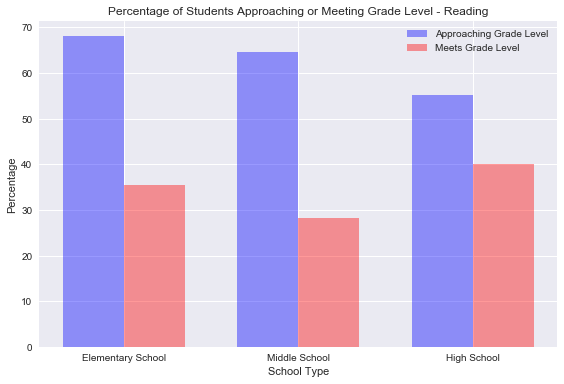

In [33]:
approach = [approach_grade_level_e, approach_grade_level_m, approach_grade_level_s]
meeting = [meets_grade_level_e, meets_grade_level_m, meets_grade_level_s]
index_approach = np.arange(len(approach))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.4
#error_config = {'ecolor': '0.3'}

group1 = ax.bar(index_approach, approach, bar_width,
               alpha=opacity, color='b', label='Approaching Grade Level')

group2 = ax.bar(index_approach+bar_width, meeting, bar_width,
               alpha=opacity, color='r', label='Meets Grade Level')

ax.set_xlabel('School Type')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Students Approaching or Meeting Grade Level - Reading')
ax.set_xticks(index_approach + bar_width / 2)
ax.set_xticklabels(('Elementary School', 'Middle School', 'High School'))
ax.legend()

fig.tight_layout()
#plt.bar(index_approach, approach)
plt.show()

# Writeup <a class="anchor" id="writeup"/>

## Data Wrangling
For this project, while there was some data wrangling to do, the dataset overall was fairly clean. The '.' character signified `NaN`, which was dealt with using `na_values='.'` on pandas `read_excel()` function. A call to `describe()` indicated that once the `NaN` was handled the next step was the presence of negative numbers in the dataset, namely `-1` and `-3`. I learned early in my data science learning path to always keep in mind the units used and context around those units; so while a person can be negative in their outlook, its quite unlikely that a teacher has `-3` students. A call to `replace()` taking a list `[-1,-3]` replaced all of the offending values with `0`. This ensured that any counts would not be thrown off by negative numbers.



## Table of Calculated Percentages
Since I created a pandas DataFrame with the percentage values calculated above, I can use this as my table.

In [34]:
percentages_df

,overall,school_type_e,school_type_m,school_type_s,female,male,african american,american indian,asian,hispanic,pacific islander,two or more races,white
Approaching grade level,62.9634,68.0628,64.535,55.1119,67.8372,58.4561,52.7959,59.2593,65.8257,64.3836,NaN,91.6667,86.7282
Meets grade level,34.0171,35.3781,28.3348,40.1547,42.1982,34.3548,28.9254,NaN,66.6667,38.3405,NaN,75.7812,76.2189


## What is one thing that you learned while completing this performance task?

From the data I learned that the gap between approaching grade level and meeting grade level was much wider than I would have suspected. My intuition was that there would be a gap, but no more than ten percentage points or so. From the data processing I learned that negative numbers in your data can have unintended side effects when calculating percentages.

## How did you identify that you needed to learn something, and how did you go about filling this gap in your knowledge?

When I discovered that the negative values in the dataset were skewing my results I realized that I would need to figure out a way to replace the values with `NaN` or another value that didn't skew results. While I had a general sense of how to do this, searching Stack Overflow yielded the solution that I used, which was to call `replace()` on the dataframe and replace those values with `0`.

## Did you feel that 60 - 90 minutes was an adequate amount of time to complete this task? Why or why not?

Given that this was a take home exercise, I probably spent more than 60-90 minutes working on it, however, had a strict time limit been enforced I think I would have been able to complete it without too much trouble. 